# Census_Income Project

In [1]:
#importing imp libraries

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
#sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')


In [2]:
#loading the dataset

data = pd.read_csv(r"https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")
data.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [3]:
data.shape

(32560, 15)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


having a mix of object and integer types

In [5]:
#checking unique values

data.nunique()


Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [6]:
data['Capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [7]:
data['Native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [8]:
#replacing ? with nan

data['Native_country'].replace(' ?', np.nan, inplace=True)

In [9]:
data.duplicated().sum()

24

In [10]:
#remove duplicate but leave one 
data.drop_duplicates(keep='first',inplace=True)
data.shape

(32536, 15)

In [11]:
data['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
# replacing '?' with NaN
data['Workclass'].replace(' ?', np.nan, inplace=True)

In [13]:
data['Occupation'].unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [14]:
#replacing ? with nan

data['Occupation'].replace(' ?',np.nan,inplace=True)

In [15]:
data['Capital_gain'].unique()

array([    0, 14084,  5178,  5013,  2407, 14344, 15024,  7688, 34095,
        4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,  2176,
        2174,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [16]:
data['Education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [17]:
data['Education_num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [18]:
data['Fnlwgt'].unique()

array([ 83311, 215646, 234721, ...,  34066,  84661, 257302], dtype=int64)

In [19]:
data.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

In [20]:
#checking nulls 

df= data[data['Workclass'].isnull()]
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,NaN,293936,7th-8th,4,Married-spouse-absent,NaN,Not-in-family,White,Male,0,0,40,NaN,<=50K
68,25,NaN,200681,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,NaN,212759,10th,6,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,<=50K
105,17,NaN,304873,10th,6,Never-married,NaN,Own-child,White,Female,34095,0,32,United-States,<=50K


observing that workclass and occupation having nan simultaneously. so we will check workclass with mode and see what is coming most and check for occupation what comes in row with that and replace nan with that value.

In [21]:
data['Workclass'].mode()

0     Private
Name: Workclass, dtype: object

In [22]:
# occupations where 'workclass' is ' Private'
df1 = data['Occupation'][data['Workclass']==' Private']

df1.mode()

0     Craft-repair
Name: Occupation, dtype: object

In [23]:
data['Workclass'].fillna(data['Workclass'].mode()[0], inplace=True)
data['Workclass'].isnull().sum()

0

In [24]:
data['Occupation'].fillna(' Craft-repair', inplace=True)
data['Occupation'].isnull().sum()

0

In [25]:
data['Native_country'].fillna(data['Native_country'].mode()[0], inplace=True)
data['Native_country'].isnull().sum()

0

In [26]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Capital_gain and Capital_loss looks weird. Have to take care of it. Hours_per_week also having some of the outliers .

In [27]:
#relacing income with 0 and 1

data = data.replace([">50K", "<=50K"], [0, 1], regex = True)
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


<AxesSubplot:xlabel='Income', ylabel='count'>

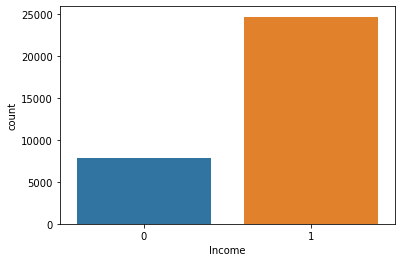

In [28]:
#checking for data balance

sns.countplot(data["Income"])


Data is highly imbalaced.

In [29]:
#blancing the data using undersampling

count1, count0 = data.Income.value_counts()
data0 = data[data['Income'] == 0]
data1 = data[data['Income'] == 1]
data1_under = data1.sample(count0)
newData = pd.concat([data1_under, data0], axis=0)

<AxesSubplot:xlabel='Income', ylabel='count'>

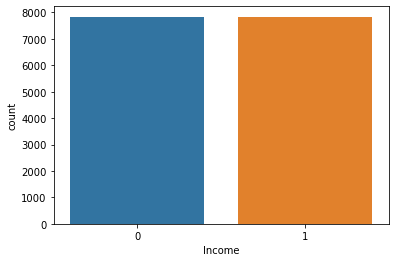

In [30]:
sns.countplot(newData["Income"])

now it is perfectly balanced good to go.

In [31]:
newData=data

In [32]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


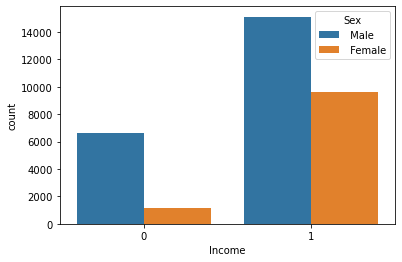

In [33]:
# How the target variable is distributed
ax = sns.countplot(data['Income'], hue=data['Sex'])

There are very few women having an income of greater than 50k in comparison with men.



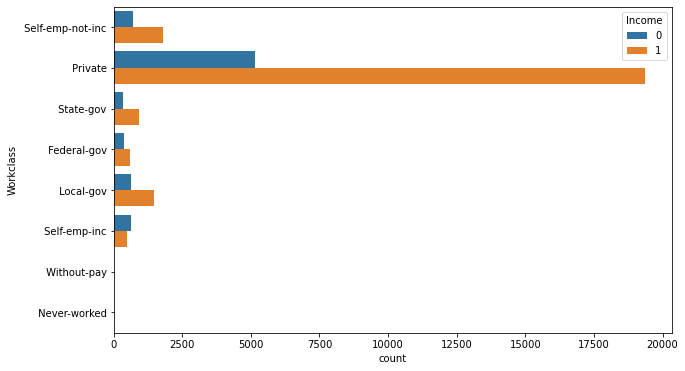

In [34]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(data=data,y='Workclass', hue='Income')

Only in Self-emp-inc the number of >=50k income is higher than <50k income.


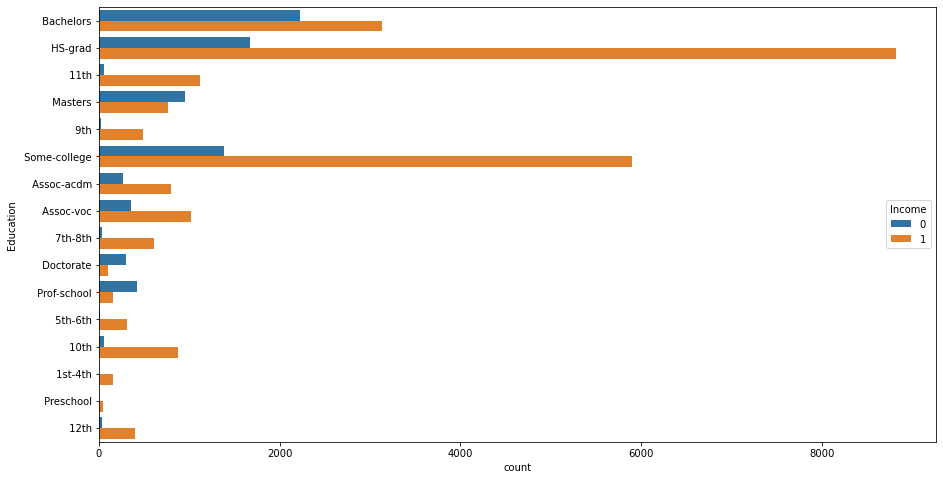

In [35]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data,y='Education', hue='Income')

Most of employees who are in masters, doctorate or prof-shcool categories have higher income. (>=50k)
Most of HS-grads have an income of <50k, and many more...



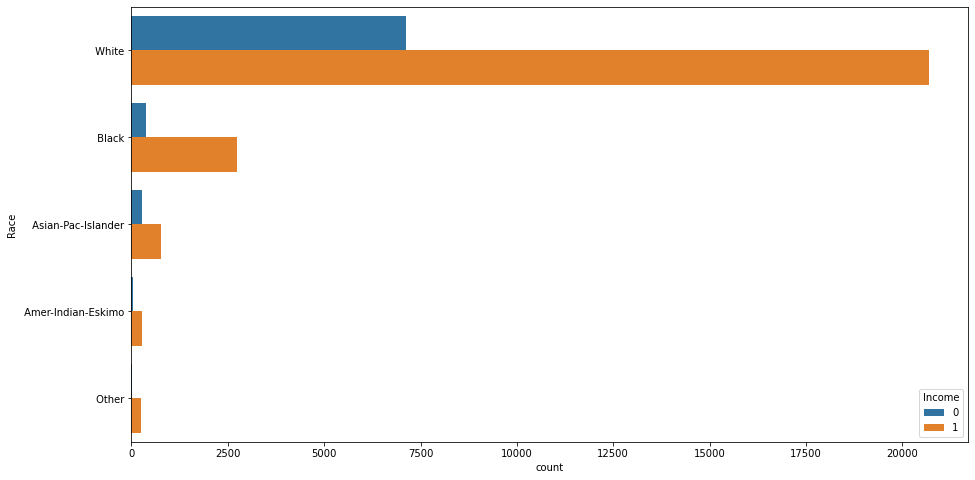

In [36]:
plt.figure(figsize=(15, 8))
ax = sns.countplot(data=data,y='Race', hue='Income')

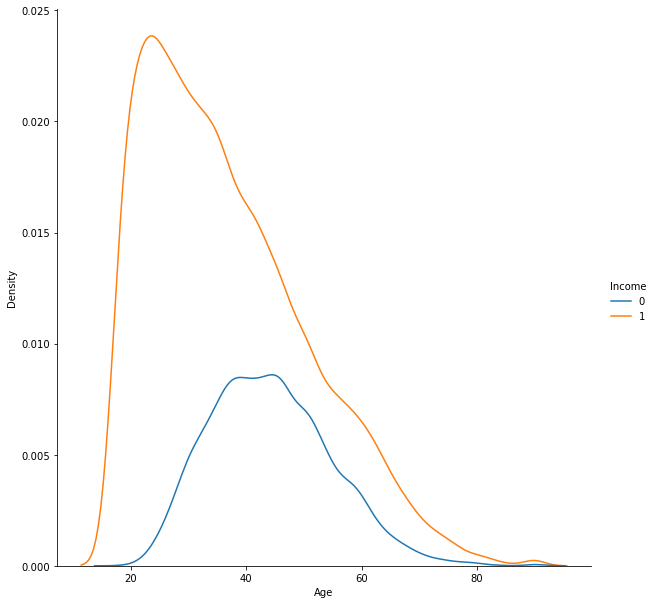

In [37]:
sns.displot(data=data, x="Age", hue="Income", kind="kde", height=8.5, aspect=1)


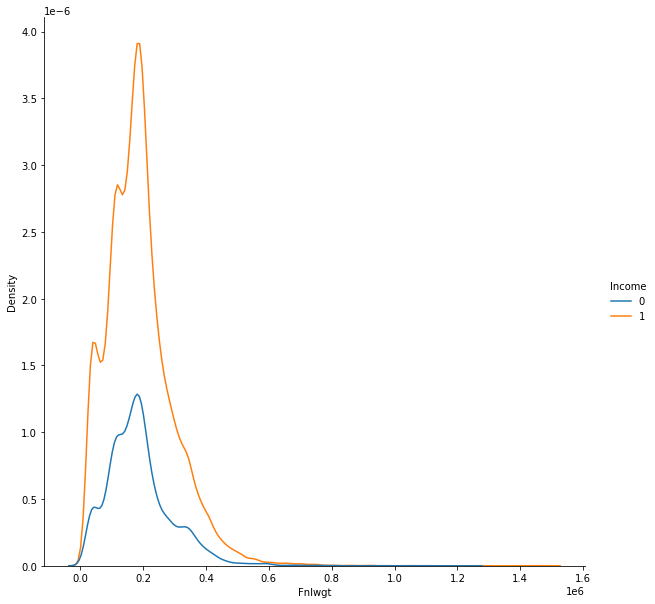

In [38]:
sns.displot(data=data, x="Fnlwgt", hue="Income", kind="kde", height=8.5, aspect=1)


seeems to be right skewed.

<AxesSubplot:ylabel='Age'>

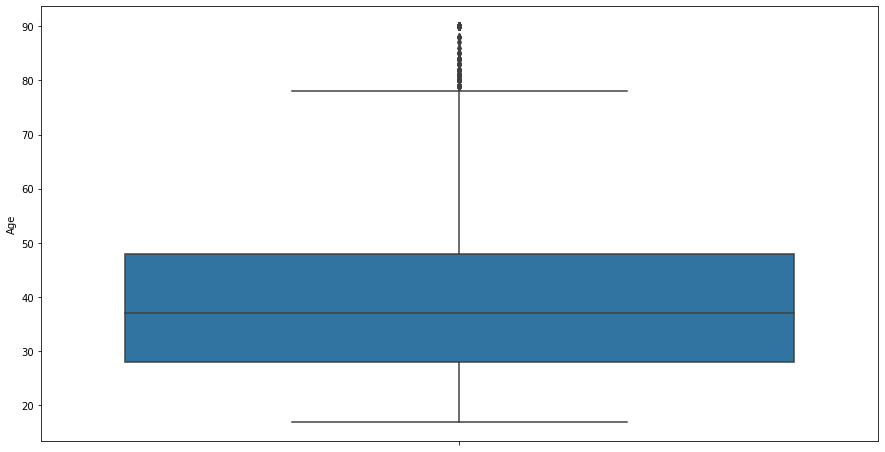

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(data=data, y="Age")


outliers detected.we will remove outliers

In [40]:
outAge = data[data['Age'] > 61]
outAge.shape #get number of rows with outliers (Q3 + 1.5(Q3 - Q1))

(2031, 15)

In [41]:
data.drop(outAge.index, inplace = True)


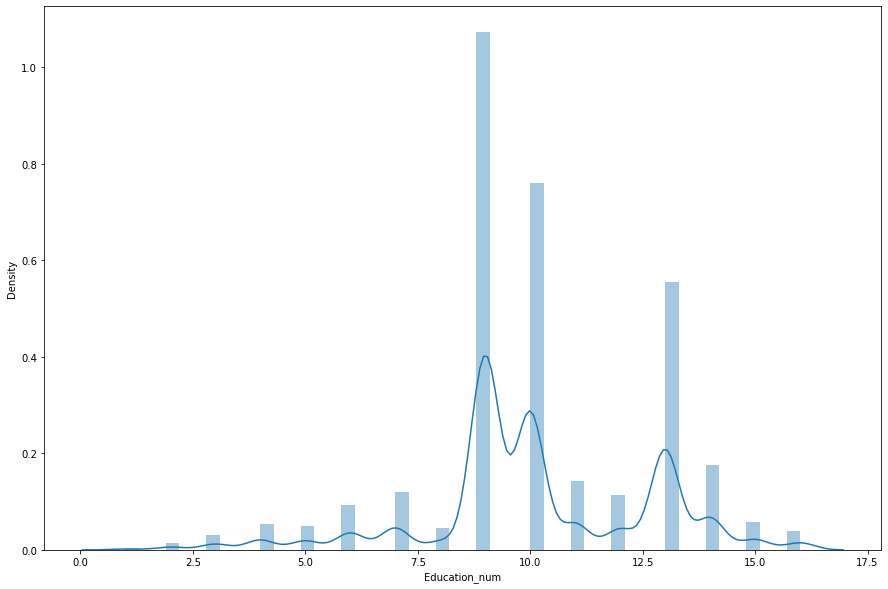

In [42]:
plt.figure(figsize=(15,10))
sns.distplot(data['Education_num'])
plt.show()

education_num is left skewed. having some of the outliers we will remove it.

In [43]:
outEdu = data[data['Education_num'] < 3.5]
outEdu.shape #get number of rows with outliers (Q1 - 1.5(Q3 - Q1))

(474, 15)

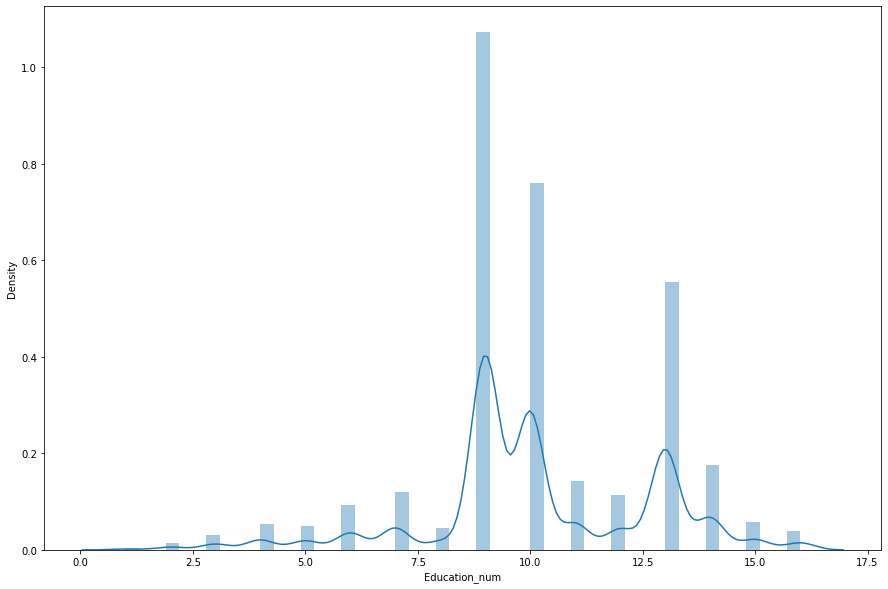

In [44]:
plt.figure(figsize=(15,10))
sns.distplot(data['Education_num'])
plt.show()

In [45]:
data.drop(outEdu.index, inplace = True)


In [46]:
# fnlwgt sampling weight, this is the number of people the census believes the entry represents, which doesnot help in predicting income, hence dropping it.
# The column education is just a string representation of the column education-num. We will drop the education column.
data.drop(['Fnlwgt', 'Education'], axis=1, inplace=True)
data.head()

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,1


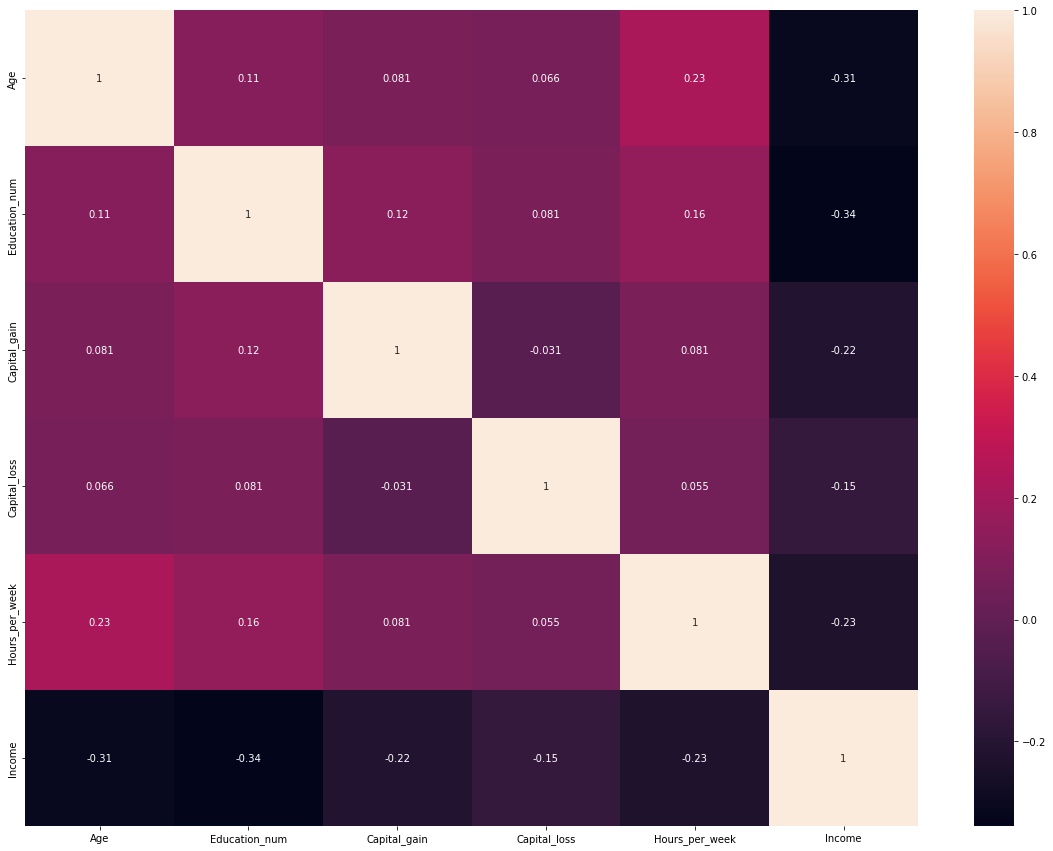

In [47]:
#checking correlation between features using heatmap:

plt.figure(figsize = (20,15))  
sns.heatmap(data.corr(),annot = True)
plt.show()

seems no correlation between features

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
ohe=OneHotEncoder()

In [50]:
#creating dummies for categorical features:

dummy1 = pd.get_dummies(data[['Workclass', 'Marital_status', 'Occupation', 'Occupation','Relationship','Race','Sex','Native_country']], drop_first=True)

# Adding the results to the dataframe
data= pd.concat([data, dummy1], axis=1)

In [51]:
data.head(10)

,Age,Workclass,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37,Private,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,...,0,0,0,0,0,0,0,1,0,0
5,49,Private,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,...,0,0,0,0,0,0,0,0,0,0
6,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,...,0,0,0,0,0,0,0,1,0,0
7,31,Private,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,...,0,0,0,0,0,0,0,1,0,0
8,42,Private,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,...,0,0,0,0,0,0,0,1,0,0
9,37,Private,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,...,0,0,0,0,0,0,0,1,0,0


In [52]:
#droping categorical features:

data = data.drop(['Workclass', 'Marital_status', 'Occupation', 'Occupation','Relationship','Race','Sex','Native_country'], 1)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30031 entries, 0 to 32559
Data columns (total 95 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Age                                         30031 non-null  int64
 1   Education_num                               30031 non-null  int64
 2   Capital_gain                                30031 non-null  int64
 3   Capital_loss                                30031 non-null  int64
 4   Hours_per_week                              30031 non-null  int64
 5   Income                                      30031 non-null  int64
 6   Workclass_ Local-gov                        30031 non-null  uint8
 7   Workclass_ Never-worked                     30031 non-null  uint8
 8   Workclass_ Private                          30031 non-null  uint8
 9   Workclass_ Self-emp-inc                     30031 non-null  uint8
 10  Workclass_ Self-emp-not-inc       

all the features and label are now int type .

In [54]:
#scaling the data

from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()

In [56]:
X = data.drop('Income', 1)
y= data['Income']

In [57]:
X= scaler.fit_transform(X)

In [58]:
X

array([[ 1.16348413,  1.17548396, -0.14215356, ...,  0.28941385,
        -0.04436783, -0.02235472],
       [ 0.12437675, -0.52810694, -0.14215356, ...,  0.28941385,
        -0.04436783, -0.02235472],
       [ 1.42326098, -1.37990238, -0.14215356, ...,  0.28941385,
        -0.04436783, -0.02235472],
       ...,
       [ 1.85622239, -0.52810694, -0.14215356, ...,  0.28941385,
        -0.04436783, -0.02235472],
       [-1.26109977, -0.52810694, -0.14215356, ...,  0.28941385,
        -0.04436783, -0.02235472],
       [ 1.3366687 , -0.52810694,  1.91218343, ...,  0.28941385,
        -0.04436783, -0.02235472]])

In [59]:
#importing imp libraries for models training:


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.tree import DecisionTreeClassifier


In [60]:
#spliting the data for train and test:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=22)

In [61]:
#definig the function for train and test the model:

def metric_score(clf,X_train,X_test,y_train,y_test,train=True):
    if train :
        y_pred=clf.predict(X_train)
        print("\n**********************************Train Result***************************************")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:2f}%")
    elif train == False :
        pred = clf.predict(X_test)
        print("\n**********************************Test Result****************************************")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:2f}%")
        print('\n \n Test Classification Report \n',classification_report(y_test,pred,digits=2))

# Knn model

In [62]:
knn = KNeighborsClassifier()

In [63]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [64]:
metric_score(knn,X_train,X_test,y_train,y_test,train=True)
metric_score(knn,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:87.359588%

**********************************Test Result****************************************
Accuracy Score:83.137986%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.67      0.59      0.63      1816
           1       0.87      0.91      0.89      5692

    accuracy                           0.83      7508
   macro avg       0.77      0.75      0.76      7508
weighted avg       0.83      0.83      0.83      7508



# Random Forest Model

In [65]:
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [66]:
metric_score(rfc,X_train,X_test,y_train,y_test,train=True)
metric_score(rfc,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:97.709009%

**********************************Test Result****************************************
Accuracy Score:84.882792%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.71      0.64      0.67      1816
           1       0.89      0.92      0.90      5692

    accuracy                           0.85      7508
   macro avg       0.80      0.78      0.79      7508
weighted avg       0.84      0.85      0.85      7508



# Decision Tree Model

In [67]:
DT = DecisionTreeClassifier()

In [68]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [69]:
metric_score(DT,X_train,X_test,y_train,y_test,train=True)
metric_score(DT,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:97.709009%

**********************************Test Result****************************************
Accuracy Score:81.393181%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.61      0.65      0.63      1816
           1       0.89      0.87      0.88      5692

    accuracy                           0.81      7508
   macro avg       0.75      0.76      0.75      7508
weighted avg       0.82      0.81      0.82      7508



# checking if the the model is under fitting or overfitting by using cross validation score

In [70]:
from sklearn.model_selection import KFold,cross_val_score


In [71]:
cross_val_score(knn,X ,y ,cv=7)

array([0.82148683, 0.82867133, 0.82144522, 0.82214452, 0.83006993,
       0.82983683, 0.82867133])

In [72]:
cross_val_score(KNeighborsClassifier(),X,y,cv=7).mean()

0.8260465705350347

In [73]:
cross_val_score(rfc,X ,y ,cv=5).mean()

0.8463253077869359

In [74]:
cross_val_score(DT,X ,y ,cv=5).mean()

0.813725750416278

all the models are fine no model is overfitting.

# Hyper Parameter Tunning

In [75]:
from sklearn.model_selection import GridSearchCV

# knn model tunning

In [76]:
param_grid={'algorithm':['kd_tree','brute'],'leaf_size':[3,5,6,7,8],'n_neighbors':[3,5,7,9,11,13]}

In [77]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)


In [78]:
gridsearch.fit(X_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [79]:
gridsearch.best_params_

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 13}

In [80]:
knn = KNeighborsClassifier(algorithm='brute',leaf_size=3,n_neighbors=13)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', leaf_size=3, n_neighbors=13)

In [81]:
metric_score(knn,X_train,X_test,y_train,y_test,train=True)
metric_score(knn,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:85.463748%

**********************************Test Result****************************************
Accuracy Score:83.630794%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.59      0.63      1816
           1       0.87      0.92      0.89      5692

    accuracy                           0.84      7508
   macro avg       0.78      0.75      0.76      7508
weighted avg       0.83      0.84      0.83      7508



# Random Forest Tunning

In [82]:
from sklearn.model_selection import RandomizedSearchCV


In [83]:
param_grid={'n_estimators':[100, 300, 500],
        'min_samples_split':[1,2,3,4],
        'min_samples_leaf':[1,2,3,4],
            'max_depth':[None,1,2,3,4,5,6,7,8]}

In [84]:
randomsearch=RandomizedSearchCV(RandomForestClassifier(),param_grid,cv=10)


In [85]:
randomsearch.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 1, 2, 3, 4, 5, 6, 7,
                                                      8],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 3, 4],
                                        'n_estimators': [100, 300, 500]})

In [86]:
randomsearch.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_depth': None}

In [87]:
rfc=RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=4,n_estimators=100)

In [88]:
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=4)

In [89]:
metric_score(rfc,X_train,X_test,y_train,y_test,train=True)
metric_score(rfc,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:84.806642%

**********************************Test Result****************************************
Accuracy Score:84.882792%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.84      0.47      0.60      1816
           1       0.85      0.97      0.91      5692

    accuracy                           0.85      7508
   macro avg       0.84      0.72      0.75      7508
weighted avg       0.85      0.85      0.83      7508



# Decision Tree Tunning

In [90]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':range(10,15),
           'min_samples_leaf':range(2,6),
           'min_samples_split':range(3,8),
           'max_leaf_nodes':range(5,10)}

In [91]:
gridsearch=GridSearchCV(estimator=DT,param_grid=param_grid,cv=5,n_jobs=-1)

In [92]:
gridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(5, 10),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(3, 8)})

In [93]:
gridsearch.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_leaf_nodes': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 3}

In [94]:
DT=DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=10,max_leaf_nodes=7,min_samples_leaf=2)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=2,
                       min_samples_split=3)

In [95]:
metric_score(DT,X_train,X_test,y_train,y_test,train=True)
metric_score(DT,X_train,X_test,y_train,y_test,train=False)


**********************************Train Result***************************************
Accuracy Score:84.726724%

**********************************Test Result****************************************
Accuracy Score:84.696324%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.53      0.63      1816
           1       0.86      0.95      0.90      5692

    accuracy                           0.85      7508
   macro avg       0.81      0.74      0.77      7508
weighted avg       0.84      0.85      0.84      7508



In [96]:
y_pred=DT.predict(X_test)

In [97]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [98]:
print('Threshold=',thresholds)
print('True Positive Rate=',tpr)
print('False positive Rate=',fpr)

Threshold= [2 1 0]
True Positive Rate= [0.        0.9478215 1.       ]
False positive Rate= [0.       0.469163 1.      ]


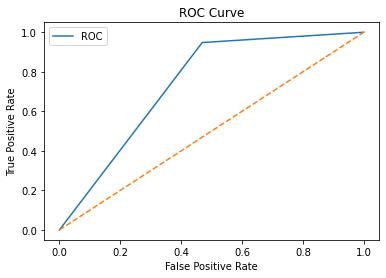

In [99]:
plt.plot(fpr,tpr,label='ROC')
plt.plot([0, 1],[0, 1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [100]:
auc_score=roc_auc_score(y_test,y_pred)
print(auc_score)

0.7393292541351801


After hyperparameter tunning Decision tree seems to be performing good as it has 85% of accuracy and recall value is also good. so finalizing Decision tree model.

In [101]:
final_model = DecisionTreeClassifier(criterion='gini',min_samples_split=3,max_depth=10,max_leaf_nodes=7,min_samples_leaf=2)


In [102]:
final_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=7, min_samples_leaf=2,
                       min_samples_split=3)

In [103]:
import joblib

In [104]:
joblib.dump(final_model,'Census_income Project')

['Census_income Project']